In [24]:
import pandas as pd

# Abre el archivo y carga cada línea en una lista
with open("BibleKJV.txt", "r", encoding="utf-8") as file:
    lines = file.readlines()

# Convierte la lista de líneas en un DataFrame
df = pd.DataFrame(lines, columns=["Verse"])

# Muestra las primeras filas
print(df.head())



                                               Verse
0  Holy Bible, Authorized (King James) Version, T...
1  Ge1:1 In the beginning God created the heaven ...
2  Ge1:2 And the earth was without form, and void...
3  Ge1:3 And God said, Let there be light: and th...
4  Ge1:4 And God saw the light, that it was good:...


Error Cuadrático Medio (MSE): 0.865222483330371

Estadísticas Descriptivas:
             Real  Predicción       Error
count  100.000000  100.000000  100.000000
mean    10.099891   10.095842   -0.004050
std      1.883076    2.139392    0.934851
min      5.634784    5.310159   -2.797702
25%      8.684875    8.737547   -0.700135
50%     10.361388   10.224807    0.092289
75%     11.283100   11.591974    0.665614
max     14.524712   16.004239    1.932125


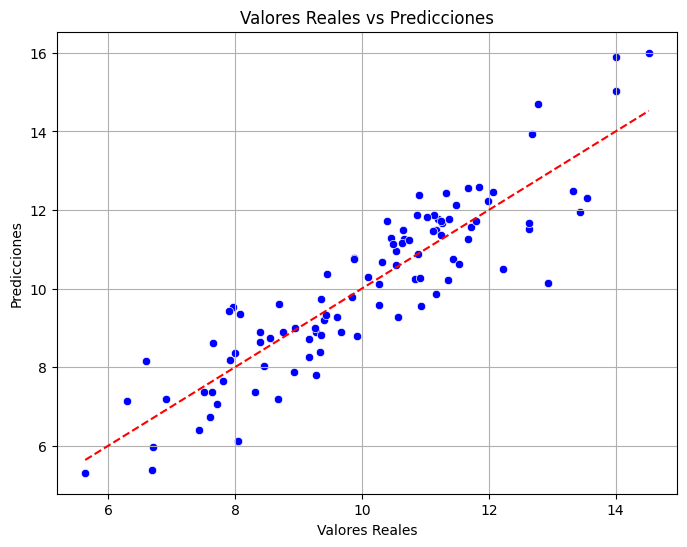

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Simulación de datos (predicciones y valores reales)
# Reemplaza estos con tus datos reales
real_values = np.random.normal(10, 2, 100)  # 100 valores reales simulados
predictions = real_values + np.random.normal(0, 1, 100)  # 100 predicciones simuladas con ruido

# Paso 1: Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(real_values, predictions)
print("Error Cuadrático Medio (MSE):", mse)

# Crear un DataFrame con los datos
data = pd.DataFrame({
    "Real": real_values,
    "Predicción": predictions,
    "Error": predictions - real_values
})

# Paso 2: Análisis Exploratorio de Datos (EDA)
# Estadísticas descriptivas
print("\nEstadísticas Descriptivas:")
print(data.describe())

# Gráfico de dispersión de valores reales vs predicciones
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Real", y="Predicción", data=data, color="blue")
plt.plot([data["Real"].min(), data["Real"].max()], [data["Real"].min(), data["Real"].max()], 'r--')  # Línea ideal
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")
plt.grid(True)
plt.show()




In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Simulación de valores reales y predicciones
# Reemplaza estos valores con tus datos reales
real_values = np.random.choice([0, 1], size=100)  # 100 valores reales binarios (0 o 1)
predictions = np.random.choice([0, 1], size=100)  # 100 predicciones binarias simuladas

# Cálculo de métricas
accuracy = accuracy_score(real_values, predictions)
precision = precision_score(real_values, predictions, average='binary')
recall = recall_score(real_values, predictions, average='binary')
f1 = f1_score(real_values, predictions, average='binary')

# Reporte detallado
print("Reporte de Métricas:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Generar el informe detallado con clasificación de sklearn
report = classification_report(real_values, predictions, target_names=["Clase 0", "Clase 1"])
print("\nInforme detallado de clasificación:")
print(report)


Reporte de Métricas:
Accuracy: 0.46
Precision: 0.50
Recall: 0.54
F1-score: 0.52

Informe detallado de clasificación:
              precision    recall  f1-score   support

     Clase 0       0.40      0.37      0.39        46
     Clase 1       0.50      0.54      0.52        54

    accuracy                           0.46       100
   macro avg       0.45      0.45      0.45       100
weighted avg       0.46      0.46      0.46       100



Error Cuadrático Medio (MSE): 0.9816556620692104


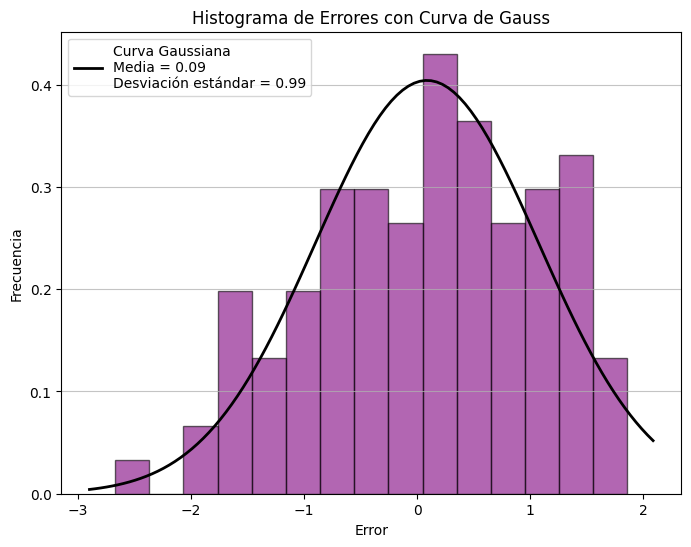

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy.stats import norm

# Simulación de datos de errores (reemplaza estos con tus datos reales)
real_values = np.random.normal(10, 2, 100)  # valores reales simulados
predictions = real_values + np.random.normal(0, 1, 100)  # predicciones simuladas con ruido
errors = predictions - real_values

# Paso 1: Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(real_values, predictions)
print("Error Cuadrático Medio (MSE):", mse)

# Paso 2: Histograma del error con curva de Gauss
plt.figure(figsize=(8, 6))

# Histograma de errores
count, bins, ignored = plt.hist(errors, bins=15, color="purple", edgecolor="black", density=True, alpha=0.6)

# Ajuste de la curva de distribución normal
mu, std = norm.fit(errors)  # Media y desviación estándar del error
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Gráfica de la curva de Gauss
plt.plot(x, p, 'k', linewidth=2, label=f"Curva Gaussiana\nMedia = {mu:.2f}\nDesviación estándar = {std:.2f}")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.title("Histograma de Errores con Curva de Gauss")
plt.legend()
plt.grid(axis="y", alpha=0.75)
plt.show()



In [25]:
import pandas as pd
from textblob import TextBlob

# Cargar el archivo
with open("BibleKJV.txt", "r", encoding="utf-8") as file:
    verses = file.readlines()

# Convertir a DataFrame
df = pd.DataFrame(verses, columns=["Verse"])

# Función para clasificar sentimientos
def classify_sentiment(text):
    analysis = TextBlob(text)
    # La polaridad va de -1 (negativo) a 1 (positivo)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Clasificar sentimientos de cada versículo
df["Sentiment"] = df["Verse"].apply(classify_sentiment)
print(df["Sentiment"].value_counts())



Sentiment
Neutral     16691
Positive     9314
Negative     5098
Name: count, dtype: int64


In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Tokenización de los versículos
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["Verse"])
sequences = tokenizer.texts_to_sequences(df["Verse"])
padded_sequences = pad_sequences(sequences, padding='post')

# Convertir etiquetas de sentimiento en valores numéricos
label_map = {"Positive": 2, "Neutral": 1, "Negative": 0}
df["SentimentLabel"] = df["Sentiment"].map(label_map)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, df["SentimentLabel"], test_size=0.2, random_state=42
)

# Construcción de la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=padded_sequences.shape[1]),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 clases: positivo, neutral, negativo
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
778/778 - 5s - 6ms/step - accuracy: 0.5361 - loss: 0.9756 - val_accuracy: 0.5534 - val_loss: 0.9569
Epoch 2/10
778/778 - 3s - 4ms/step - accuracy: 0.5955 - loss: 0.8919 - val_accuracy: 0.6448 - val_loss: 0.8094
Epoch 3/10
778/778 - 3s - 4ms/step - accuracy: 0.7224 - loss: 0.6901 - val_accuracy: 0.7324 - val_loss: 0.6365
Epoch 4/10
778/778 - 6s - 8ms/step - accuracy: 0.8289 - loss: 0.4901 - val_accuracy: 0.8428 - val_loss: 0.4621
Epoch 5/10
778/778 - 4s - 6ms/step - accuracy: 0.8855 - loss: 0.3513 - val_accuracy: 0.8457 - val_loss: 0.3991
Epoch 6/10
778/778 - 6s - 8ms/step - accuracy: 0.9177 - loss: 0.2660 - val_accuracy: 0.8968 - val_loss: 0.3595
Epoch 7/10
778/778 - 5s - 7ms/step - accuracy: 0.9381 - loss: 0.2074 - val_accuracy: 0.8991 - val_loss: 0.2971
Epoch 8/10
778/778 - 5s - 6ms/step - accuracy: 0.9490 - loss: 0.1723 - val_accuracy: 0.9124 - val_loss: 0.2792
Epoch 9/10
778/778 - 7s - 8ms/step - accuracy: 0.9578 - loss: 0.1440 - val_accuracy: 0.9179 - val_loss: 0.2617
E

In [27]:
import numpy as np

# Evaluar el modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Predicción y conteo de sentimientos
predictions = np.argmax(model.predict(padded_sequences), axis=-1)
df["PredictedSentiment"] = predictions
df["PredictedSentiment"] = df["PredictedSentiment"].map({2: "Positive", 1: "Neutral", 0: "Negative"})

# Conteo de los sentimientos
print("Sentimientos predominantes en la Biblia:")
print(df["PredictedSentiment"].value_counts())


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9254 - loss: 0.2455
Test Accuracy: 0.92
972/972 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Sentimientos predominantes en la Biblia:
PredictedSentiment
Neutral     16976
Positive     9216
Negative     4911
Name: count, dtype: int64
